# Required Files Installation

In [1]:
pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.3 MB/s eta 0:00:00
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199775 sha256=7983c725d619bf1ebd9a24e3be2786c361c6f0fee0c234963eb6

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Uploading Datset

In [3]:
dataset = "articles.csv"
data = pd.read_csv(dataset)
data.head()

,Index,News,Category,category_id
0,1,တီကျစ်ကျောက် မီးသွေးဓာတ်အားပေး စက်ရုံကို သက်တမ...,business,0
1,2,ရန်ကုန်တိုင်းအစိုးရ အစီအစဉ်ဖြင့် ရောင်းချမည့် ...,business,0
2,3,ရန်ကုန်မြို့သစ်စီမံကိန်း အတွက် လမ်းကြောင်းကွန်...,business,0
3,4,ပြည်တွင်း စက်သုံးဆီဈေး ရက်ပိုင်းအတွင်း ပြန်လည်...,business,0
4,5,ကချင်ပြည်နယ် မြစ် ကြီးနားနှင့် ချီဖွေမြို့အတွက...,business,0


# Data Checking and Visualization

In [4]:
data.isnull().sum()

Index          0
News           0
Category       0
category_id    0
dtype: int64

<Axes: xlabel='Category'>

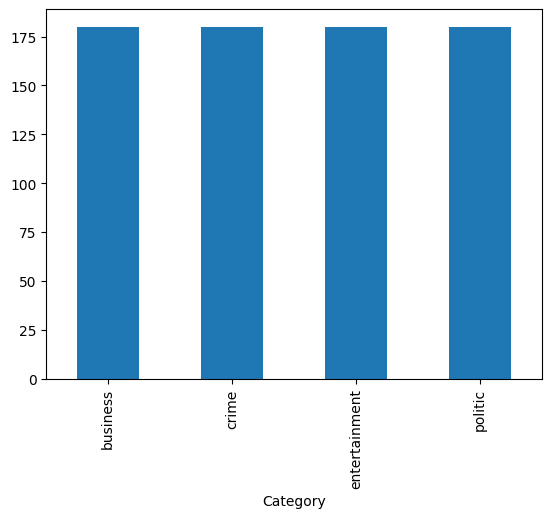

In [5]:
# Showing Articles by categories
colslist = ['Index','News', 'Category', 'category_id']
data.columns = colslist
data.groupby('Category').Index.count().plot.bar(ylim=0)

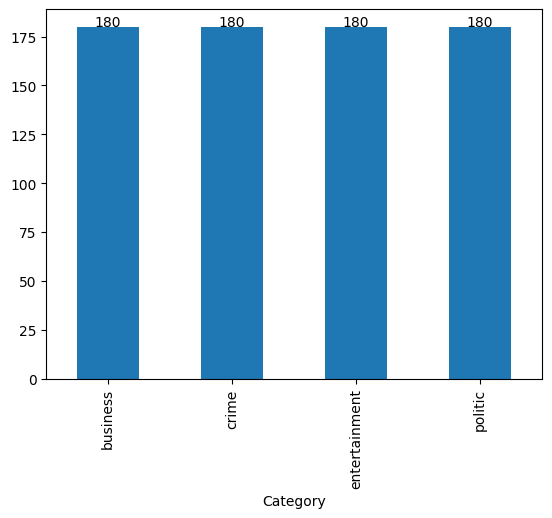

In [6]:
# Showing the article presence counts by each category.
colslist = ['Index','News', 'Category', 'category_id']
data.columns = colslist

# Grouping data by 'Category' and counting occurrences of 'Index'
category_counts = data.groupby('Category').Index.count()

# Creating the bar plot
category_counts.plot.bar(ylim=0)

# Adding value labels to each bar
for i, count in enumerate(category_counts):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.show()

In [7]:
# Viewing the data as in whole
list_of_dicts = data.to_dict(orient='records')
list_of_dicts[0]

{'Index': 1,
 'News': 'တီကျစ်ကျောက် မီးသွေးဓာတ်အားပေး စက်ရုံကို သက်တမ်းတိုး ထပ်မံလည်ပတ် ရန် ရှမ်းပြည်နယ်အစိုးရနှင့် ၀န် ကြီးဌာနက ကန့်ကွက်ရန်မရှိ ကြောင်း လျှပ်စစ်နှင့် စွမ်းအင်၀န် ကြီးဌာန ပြောရေးဆိုခွင့်နှင့် သတင်းပြန်ကြားရေး အဖွဲ့က ဇူလိုင် ၁၂ ရက်တွင် သတင်းထုတ်ပြန်သည်။ ရှမ်းပြည်နယ်ရှိ ကျောက်မီး သွေးသုံး ဓာတ်အားပေးစက်ရုံကို ၂၀၁၇ မေလ ၂၆ ရက်တွင် စမ်း သပ်လည်ပတ်ရာ တစ်နှစ်ပြည့် ၍ ထပ်မံသက်တမ်းတိုးရန် စီစဉ် နေပြီး လက်ရှိ၌ ပြည်ထောင်စု အစိုးရအဖွဲ့နှင့် သမ္မတရုံးသို့ တင်ပြထားကြောင်း လျှပ်စစ်ဓာတ် အားထုတ်လုပ်ရေးလုပ်ငန်း ဦးဆောင်ညွှန်ကြားရေးမှူး ဦးခင်မောင်၀င်းက ပြောသည်။ ‘‘အရင်တုန်းက ပြာတွေ ထွက်တယ်။ မီးခိုးနံ့တွေ ထွက် တယ်။ ဟိုတုန်းကစက်တွေ ဟောင်းစုတ်နေပါပြီ။ အခုစက်တွေပြင် ပြီးသွားပြီ။ ကမ္ဘာ့ဘဏ်သတ်မှတ် ချက်နှုန်း ပတ်၀န်းကျင်ထိန်းသိမ်း ရေး ၀န်ကြီးဌာနက သတ်မှတ်ထားတဲ့ ဂိုက်လိုင်းအတိုင်း ဒီအတွင်းထဲ မှာ ပြင်ပြီးသွားပြီ’’ဟု ၎င်းကဆက် လက်ပြောသည်။ အဆိုပါ စက်ရုံကို တရုတ် ကုမ္ပဏီက စနစ်တကျပြုပြင်ကာ အမျိုးသား ပတ်၀န်းကျင်ဆိုင်ရာ အရည်အသွေး (ထုတ်လွှတ်မှု) လမ်းညွှန်ချက်များနှင့် ကမ္ဘာ့ဘဏ်၏ သတ်မှတ်ချက် စံချိန်စံညွှန်းမျာ

# Data Preprocessing

### Convert the Article to Sentences

In [8]:
final_dict_list=[]
for obj in list_of_dicts:
    text = obj['News']
    sentences = text.split("။")
    # Remove any empty strings resulting from consecutive delimiters
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()]
    my_dict_list = [{"Index":obj['Index'],"News": item, "Category":obj['Category'],"category_id":obj['category_id']} for item in sentences]
    final_dict_list.extend(my_dict_list)
data_list = [{'Index': i+1, 'News': item['News'], 'Category': item['Category'], 'category_id': item['category_id']} for i, item in enumerate(final_dict_list)]

In [9]:
data = pd.DataFrame(data_list)
data.head()

,Index,News,Category,category_id
0,1,တီကျစ်ကျောက် မီးသွေးဓာတ်အားပေး စက်ရုံကို သက်တမ...,business,0
1,2,ရှမ်းပြည်နယ်ရှိ ကျောက်မီး သွေးသုံး ဓာတ်အားပေးစ...,business,0
2,3,‘‘အရင်တုန်းက ပြာတွေ ထွက်တယ်,business,0
3,4,မီးခိုးနံ့တွေ ထွက် တယ်,business,0
4,5,ဟိုတုန်းကစက်တွေ ဟောင်းစုတ်နေပါပြီ,business,0


In [10]:
data.isnull().sum()

Index          0
News           0
Category       0
category_id    0
dtype: int64

### Visualization the segmented sentences count for each category.



<Axes: xlabel='Category'>

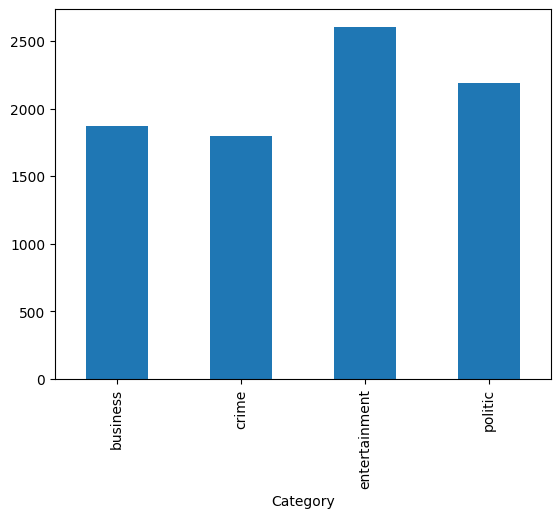

In [11]:
colslist = ['Index','News', 'Category', 'category_id']
data.columns = colslist
data.groupby('Category').Index.count().plot.bar(ylim=0)

### Stopword Loading

In [14]:
stopwordslist = []
slist = []
with open("stopwords.txt", encoding = 'utf8') as stopwordsfile:
    stopwords = stopwordsfile.readlines()
    slist.extend(stopwords)
    for w in range(len(slist)):
        temp = slist[w]
        stopwordslist.append(temp.rstrip())

In [15]:
for i in stopwordslist:
  print(i)

က
ကတည်းက
ကတော့
ကပ
ကဘာ
ကရ
ကလ
ကလူ
ကာ
ကာလ
ကို
ကိုယ့်
ကိုယ်တိုင်
ကုန်
ကေ
ကော
ကဲ
ကျ
ကျန
ကျော်
ကျွန်တော့်
ကျွန်တော်
ကျွန်မ
ကြ
ကြာ
ကြာတော့
ကြိမ်မြောက်
ကြီး
ကြောင်း
ခင်
ခဏခဏ
ခန့်
ခါ
ခု
ခုချိန်
ခဲ့
ခံ
ချ
ချင်
ချင်း
ချိန်
ခြင်း
စက
စဉ်
စရာ
စသည့်
စာ
စီ
စီး
စု
စုံ
စေ
စေသော
စွာ
ဆ
ဆက်
ဆန
ဆို
ဆိုင်ရာ
ဆိုပြီး
ဆိုသည်
ည
ညနေ
ညီ
တ
တကယ်
တက်
တချို့
တခြား
တင်
တစ်ဆင့်
တစ်ဦး
တည်း
တတ်
တန
တယ်
တာ
တာကို
တို
တိုင်း
တို့
တို့သည်
တိုး
တီ
တုန်း
တော့
တော်
တော်တော်လေး
တဲ့
တွင်
တွေ
တွေ့
ထက်
ထင်
ထပ်
ထား
ထားသည်
ထိ
ထို
ထိုသို့
ထို့အပြင်
ထုတ်
ထူး
ထဲ
ထဲက
ထံ
ထွက်
ထွန်း
ထွေ
ထွေထွေထူးထူး
ဒါ
ဒါကို
ဒါကြောင့်
ဒါတွေ
ဒါတွေက
ဒါနဲ့
ဒါပေမဲ့
ဒါလေး
ဒါ့အပြင်
ဒီ
ဒီထက်
ဒီနေ့
ဒီမှာ
ဒီလို
ဒု
နက်
နဂို
နည်း
နား
နိုင်
နိုင်သည်
နီ
နေ
နေကျ
နောက်
နောက်ဆုံး
နောက်တစ်ခု
နောက်ထပ်
နောက်ပြီး
နော့
နော်
နေ့
နဲ့
နှင့်
နှင့်အတူ
ပ
ပင
ပတ
ပတ်သက်
ပါ
ပါပ
ပါဝင်
ပါသည်
ပိတ်
ပို
ပိုင်း
ပိုမို
ပို့
ပုံ
ပေ
ပေါ
ပေါင်း
ပေါ့
ပေါ်
ပေး
ပျော်
ပြ
ပြန်
ပြီ
ပြီး
ပြီးခဲ့သည့်
ပြီးတော့
ပြု
ပြော
ပြောကြား
ပြောသည်
ပြဲ
ပွဲ
ဖ
ဖက်
ဖို့
ဖူး
ဖော်
ဖြင့်
ဖြစ်
ဖြစ်ကြောင်း
ဖြစ်တယ်
ဖြစ်ပါတယ်
ဖြစ

### Preprocessing

In [19]:
import pyidaungsu as pds
import re

# CleanPattern = re.compile(r'\d+|[၊။!-/:_\'’"”■—[-`{-~\t ]|[A-Za-z0-9]')
CleanPattern = re.compile(r'\d+|[၊။!-/:_\'’"”■—[-`{-~\t ]')
def clean_sentence(sentence):
     # sentence = sentence.replace("_"," ")
     sent = CleanPattern.sub(" ",str(sentence))
     return sent.lower()

# Removed everything from the stopword list.
def stop_word(sentence):
  new_sentence = []
  for word in sentence.split():
    if word not in stopwordslist:
      new_sentence.append(word)
  return(' '.join(new_sentence))


def tokenize(line): # Changing it into one word structure.
    line = clean_sentence(line)
    print(line)
    sentence = pds.tokenize(line,form="word")
    sentence = ' '.join([str(elem) for elem in sentence])
    print(sentence)
    sentence = stop_word(sentence)
    print(sentence)
    return sentence

# data['News'] = data['News'].apply(tokenize)
# data.head(10)


# One or more digits.
# Specific Burmese characters (၊။).
# Various special characters.
# Uppercase and lowercase letters.

In [20]:
print(tokenize("ကမ္ဘာ့ရေနံစျေး (WTI) သည် ၂၀၂၃ ခုနှစ် အောက်တိုဘာ ၂၀ ရက်တွင် တစ်စည် ဒေါ်လာ ၈၉ ဝန်းကျင်ရှိပြီး ပြည်တွင်း စျေးကွက်တွင် စက်သုံးဆီစျေးနှုန်းများအနေဖြင့် ဒီဇယ်တစ်လီတာလျှင် ၂၂၅၅ ကျပ်၊ အောက် တိန်း 92 Ron တစ်လီတာ၂၀၁၅ ကျပ်၊ အောက်တိန်း 95 Ron တစ်လီတာ ၂၁၁၅ ကျပ်ရှိခဲ့ကြောင်း စက်သုံးဆီအရောင်းဆိုင်များ၏ စျေးနှုန်းများအရ သိရသည်။"))

ကမ္ဘာ့ရေနံစျေး  wti  သည်   ခုနှစ် အောက်တိုဘာ   ရက်တွင် တစ်စည် ဒေါ်လာ   ဝန်းကျင်ရှိပြီး ပြည်တွင်း စျေးကွက်တွင် စက်သုံးဆီစျေးနှုန်းများအနေဖြင့် ဒီဇယ်တစ်လီတာလျှင်   ကျပ်  အောက် တိန်း   ron တစ်လီတာ  ကျပ်  အောက်တိန်း   ron တစ်လီတာ   ကျပ်ရှိခဲ့ကြောင်း စက်သုံးဆီအရောင်းဆိုင်များ၏ စျေးနှုန်းများအရ သိရသည် 
ကမ္ဘာ့ ရေနံစျေးwti သည် ခုနှစ် အောက်တိုဘာ ရက် တွင် တစ် စည် ဒေါ်လာဝန်းကျင် ရှိ ပြီး ပြည် တွင်းစျေးကွက် တွင် စက်သုံးဆီစျေးနှုန်း များ အနေဖြင့် ဒီဇယ် တစ်လီတာ လျှင် ကျပ်အောက်တိန်းron တစ်လီတာ ကျပ်အောက်တိန်းron တစ်လီတာ ကျပ် ရှိ ခဲ့ ကြောင်း စက်သုံးဆီ အရောင်း ဆိုင် များ ၏ စျေးနှုန်း များ အရ သိရ သည်
ကမ္ဘာ့ ရေနံစျေးwti ခုနှစ် အောက်တိုဘာ တစ် စည် ဒေါ်လာဝန်းကျင် ပြည် တွင်းစျေးကွက် စက်သုံးဆီစျေးနှုန်း ဒီဇယ် တစ်လီတာ ကျပ်အောက်တိန်းron တစ်လီတာ ကျပ်အောက်တိန်းron တစ်လီတာ ကျပ် စက်သုံးဆီ အရောင်း ဆိုင် စျေးနှုန်း
ကမ္ဘာ့ ရေနံစျေးwti ခုနှစ် အောက်တိုဘာ တစ် စည် ဒေါ်လာဝန်းကျင် ပြည် တွင်းစျေးကွက် စက်သုံးဆီစျေးနှုန်း ဒီဇယ် တစ်လီတာ ကျပ်အောက်တိန်းron တစ်လီတာ ကျပ်အောက်တိန်းron တစ်လီတာ ကျပ် စက်သုံးဆီ အရောင်း ဆိုင် စျေးနှုန်း


### Saving Structured and Clean Dataset File.

In [ ]:
csv_file_path = '/content/sample_data/preprocessed.csv'  # Change the path as needed
data.to_csv(csv_file_path, index=False)

## Applying Train Test Split for Model Training.

- Splitted each and every categories equally with ratio of 80-20 Train and test.

- This will be helpful when we want to feed the model with equal number of sample size from each category in order to perform equally better on each categories.

In [ ]:
from sklearn.model_selection import train_test_split
# Assuming your dataset has columns News,Category
features = data['News']
labels = data['Category']

In [ ]:
data.shape[0]

8464

In [ ]:
train_data_list = []
test_data_list = []

# Iterate over each unique class and split the data
for category in labels.unique():
    # Filter data for the current category
    category_data = data[data['Category'] == category]

    # Split the data into train and test sets (80% train, 20% test)
    train_set, test_set = train_test_split(category_data, test_size=0.2, random_state=42)

    # Append the train and test sets to the respective lists
    train_data_list.append(train_set)
    test_data_list.append(test_set)

# Create DataFrames from the lists
train_data = pd.concat(train_data_list, ignore_index=True)
test_data = pd.concat(test_data_list, ignore_index=True)

In [ ]:
train_data.shape[0]

6769

In [ ]:
test_data.shape[0]

1695

##  Assigning Train and Test Data for model training

In [ ]:
# For Training

train_data = train_data[["News", "Category"]]

X_train = np.array(train_data["News"])
y_train = np.array(train_data["Category"])

In [ ]:
# For Testing

test_data = test_data[["News", "Category"]]

X_test = np.array(test_data["News"])
y_test = np.array(test_data["Category"])

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6769,) (1695,) (6769,) (1695,)


# Applying Vectorization

In [ ]:
def tokenize(line):
    sentence = pds.tokenize(line,form="word")
    return sentence

#vectorizer = TfidfVectorizer(tokenizer=tokenize,ngram_range=(1,2))
vectorizer = TfidfVectorizer(tokenizer=tokenize,ngram_range=(1,2), min_df = 3)
# X_train = vectorizer.fit_transform(X_train)
# X_test = vectorizer.fit_transform(X_test)

X_train = vectorizer.fit_transform(X_train)  # Fit and transform on the training data
X_test = vectorizer.transform(X_test)  # Transform using the same vectorizer on the test data

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


When you use the fit_transform method on the training data with the TfidfVectorizer, it not only transforms the data but also learns the vocabulary and other parameters. When you later use the same vectorizer to transform the test data, it applies the same transformations and uses the vocabulary learned from the training data. This ensures that the dimensions (number of features) of the training and test data match.

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6769, 6571) (1695, 6571) (6769,) (1695,)


In [ ]:
feature_names = vectorizer.get_feature_names_out()
print(len(feature_names))

6571


## Sorting Features with their occurance count.

In [ ]:
# Calculate occurrence count for each feature
occurrence_counts = X_train.sum(axis=0)
# Convert occurrence counts to a dense array
occurrence_counts = np.asarray(occurrence_counts).reshape(-1)
# Create a list of tuples (feature_name, occurrence_count)
features_with_counts = list(zip(feature_names, occurrence_counts))
# Sort features based on occurrence count
sorted_features = sorted(features_with_counts, key=lambda x: x[1], reverse=True)
# 6980 (With Previous StopWord Version)

In [ ]:
# Print the sorted features
for feature, count in sorted_features:
    print(f"{feature}: {count}")

Streaming output truncated to the last 5000 lines.
အစာ: 2.757249613552651
မီးရှို့: 2.7546086691969816
ဆန်ခါတင်: 2.752944270519659
ကိုယ်စားပြု: 2.7510785018206776
ဥပဒေ အတိုင်း: 2.750760900537709
ခုနှစ် အကောင်းဆုံး: 2.7496439396399355
ဆောင်းပါး: 2.748947770735047
စာရင်းဝင်: 2.748068844261506
ညှိ: 2.7480518926454867
အုပ်ချုပ်ကောင်စီ ရေးဆို: 2.744132751084637
အပစ် အခတ်: 2.7429677070622778
မြန်မာ ပြည်: 2.741541514126391
သင်္ဃန်း ကျွန်း: 2.740693105914842
အချုပ် အခြာ: 2.7395667410928066
အခြာ: 2.7395667410928066
စာ: 2.735365573168495
အထောက်အထား: 2.7337774102283428
တစ် ဦး: 2.7295016798150473
ထိရောက်အရေးယူ: 2.7277223695988875
ကြုံတွေ့: 2.726508677979445
တစ်သောင်း: 2.7260681172907635
တစ်ခန်း: 2.726026155487453
ပုဂ္ဂလိက ဘဏ်: 2.724567979649848
အမှာ: 2.7230971340606334
မပြု: 2.7190299137583644
မြန်မာ ရုပ်ရှင်: 2.718202058220444
အခိုင်အမာ: 2.7167269398775487
ယင်းပြိုင်ပွဲ: 2.7162878339628374
အကောင့်: 2.7151239652108274
အချိန်ယူ: 2.713911851003251
လက်ရွေးစင်: 2.7104496705596137
လက်ရောက်: 2.70826807

## Categorizing each features to it's category.

In this case, as it should, a feature can represent more than one category.


In [ ]:
import numpy as np

# Step 1: Identify unique categories/classes in y_train
unique_categories = np.unique(y_train)

# Dictionary to store category name, feature names, and their occurrence counts for each category
category_data = {}

# Iterate through each category
for category in unique_categories:
    # Find indices of samples belonging to the current category
    category_indices = np.where(y_train == category)[0]

    # Subset corresponding rows from X_train
    X_train_category = X_train[category_indices]

    # Extract feature names for the current category
    feature_names_in_category = [feature_names[i] for i in range(len(feature_names)) if X_train_category[:, i].sum() > 0]

    # Count the occurrence of each feature within the category
    feature_counts = X_train_category.sum(axis=0).A1

    # Create a list of tuples containing feature name and occurrence count
    feature_counts_list = [(feature_names_in_category[i], feature_counts[i]) for i in range(len(feature_names_in_category))]

    # Sort the list of tuples by occurrence count in descending order
    sorted_feature_counts = sorted(feature_counts_list, key=lambda x: x[1], reverse=True)

    # Store the sorted list of tuples along with the category name in the dictionary
    category_data[category] = {'category_name': category, 'feature_counts': sorted_feature_counts}

# Now category_data dictionary contains category name, feature names, and their occurrence counts sorted from higher to lower for each category
# You can access this information for a specific category using the category name as key

# Save category data to variables for each category
category1_name = category_data[unique_categories[0]]['category_name']
category1_feature_counts = category_data[unique_categories[0]]['feature_counts']

category2_name = category_data[unique_categories[1]]['category_name']
category2_feature_counts = category_data[unique_categories[1]]['feature_counts']

category3_name = category_data[unique_categories[2]]['category_name']
category3_feature_counts = category_data[unique_categories[2]]['feature_counts']

category4_name = category_data[unique_categories[3]]['category_name']
category4_feature_counts = category_data[unique_categories[3]]['feature_counts']


In [ ]:
for category, data in category_data.items():
    total_features = len(data['feature_counts'])
    print(f"Total number of features in {category}: {total_features}")

Total number of features in business: 3214
Total number of features in crime: 2623
Total number of features in entertainment: 2459
Total number of features in politic: 3406


In [ ]:
print("Category 1 Name:", category1_name)
print("Category 1 Feature Counts:")
for feature_name, occurrence_count in category1_feature_counts[:10]:
    print(f"Feature Name: {feature_name}, Occurrence Count: {occurrence_count}")

Category 1 Name: business
Category 1 Feature Counts:
Feature Name: သန်းထရပ်ကား တင်သွင်း, Occurrence Count: 59.259740632318355
Feature Name: ဝက်, Occurrence Count: 42.554146110433635
Feature Name: ချမှတ်, Occurrence Count: 34.51736848703122
Feature Name: လုပ်ကွက်, Occurrence Count: 34.32510154226309
Feature Name: ဝင်ရောက် ကုမ္ပဏီ, Occurrence Count: 28.718402149467952
Feature Name: အိုင်ယာလန်, Occurrence Count: 27.84773967706372
Feature Name: တရုတ်လုပ်ငန်းရှင်, Occurrence Count: 24.525075835804163
Feature Name: ရာခိုင်နှုန်း ကျဆင်း, Occurrence Count: 22.385692489797208
Feature Name: အီလက်ထရွန်နစ် ငွေ, Occurrence Count: 19.927916933777304
Feature Name: နိုင်ငံ ငြိမ်းချမ်း, Occurrence Count: 18.0177050441114


In [ ]:
print("Category 2 Name:", category2_name)
print("Category 2 Feature Counts:")
for feature_name, occurrence_count in category2_feature_counts[:10]:
    print(f"Feature Name: {feature_name}, Occurrence Count: {occurrence_count}")

Category 2 Name: crime
Category 2 Feature Counts:
Feature Name: ရှိ, Occurrence Count: 31.050312382281458
Feature Name: ရေနံမ, Occurrence Count: 22.567575344825883
Feature Name: အသင်း, Occurrence Count: 19.485449631332944
Feature Name: ပစ်, Occurrence Count: 18.36672079325726
Feature Name: ဇွန် ရက်ရုံး, Occurrence Count: 16.93734857092346
Feature Name: မူးယစ်ဆေးဝါး ဖမ်းမိ, Occurrence Count: 16.828781515521367
Feature Name: အဆင်ပြေ, Occurrence Count: 15.925350818085091
Feature Name: မြို့သစ်ဆိပ်ကမ်း မြို့နယ်, Occurrence Count: 15.31072438884182
Feature Name: လဲလှယ်, Occurrence Count: 13.24643809746608
Feature Name: လိမ်လည်, Occurrence Count: 12.73255989736791


In [ ]:
print("Category 3 Name:", category3_name)
print("Category 3 Feature Counts:")
for feature_name, occurrence_count in category3_feature_counts[:10]:
    print(f"Feature Name: {feature_name}, Occurrence Count: {occurrence_count}")

Category 3 Name: entertainment
Category 3 Feature Counts:
Feature Name: ရက်နာရီ, Occurrence Count: 46.145962738968834
Feature Name: တိုက်, Occurrence Count: 34.234168245886934
Feature Name: ရက်စာမျက်နှာ, Occurrence Count: 32.143245247603545
Feature Name: ဇာတ်ကား စက်တင်ဘာ, Occurrence Count: 21.809877215157666
Feature Name: မေရက် ပြုလုပ်, Occurrence Count: 17.230892838691076
Feature Name: ရရင်, Occurrence Count: 16.780054005330268
Feature Name: ပြတ်, Occurrence Count: 15.69649564739908
Feature Name: ကြုံတွေ့, Occurrence Count: 14.96467514767146
Feature Name: ပြဿနာ, Occurrence Count: 14.149137366381408
Feature Name: လုပ်ကြည့်, Occurrence Count: 13.566425612376616


In [ ]:
print("Category 4 Name:", category4_name)
print("Category 4 Feature Counts:")
for feature_name, occurrence_count in category4_feature_counts[:10]:
    print(f"Feature Name: {feature_name}, Occurrence Count: {occurrence_count}")

Category 4 Name: politic
Category 4 Feature Counts:
Feature Name: ဝန်ကြီး ဦးဉာဏ်ထွန်း, Occurrence Count: 56.50538456189201
Feature Name: အတည်ပြု, Occurrence Count: 48.520890039824785
Feature Name: ပိတ်သိမ်း, Occurrence Count: 36.237683990962346
Feature Name: အမှတ်စဉ်, Occurrence Count: 27.47484880970123
Feature Name: ကျော်စိုးလင်း, Occurrence Count: 26.766008974770212
Feature Name: ကျယ်ပြန့်, Occurrence Count: 26.480708202593515
Feature Name: ဘယ်, Occurrence Count: 24.923976189936422
Feature Name: လိင်ပိုင်း, Occurrence Count: 23.744080297909495
Feature Name: သေဆုံး ဒဏ်ရာ, Occurrence Count: 23.589438733016873
Feature Name: ချမှတ်ဆောင်ရွက်, Occurrence Count: 19.867211214330386


## Categorizing each features to it's category.

In this case, a feature represents only one unique category.

In [ ]:
import numpy as np

# Step 1: Identify unique categories/classes in y_train
unique_categories_less = np.unique(y_train)

# Dictionary to store category name, feature names, and their occurrence counts for each category
category_data_less = {}

# Set to store features already included in previous categories
included_features_less = set()

# Iterate through each category
for category in unique_categories_less:
    # Find indices of samples belonging to the current category
    category_indices = np.where(y_train == category)[0]

    # Subset corresponding rows from X_train
    X_train_category = X_train[category_indices]

    # Extract feature names for the current category
    feature_names_in_category = [feature_names[i] for i in range(len(feature_names)) if X_train_category[:, i].sum() > 0]

    # Filter out features that are already included in previous categories
    feature_names_in_category = [feature_name for feature_name in feature_names_in_category if feature_name not in included_features_less]

    # Update the set of included features
    included_features_less.update(feature_names_in_category)

    # Count the occurrence of each feature within the category
    feature_counts = X_train_category.sum(axis=0).A1

    # Create a list of tuples containing feature name and occurrence count
    feature_counts_list = [(feature_names_in_category[i], feature_counts[i]) for i in range(len(feature_names_in_category))]

    # Sort the list of tuples by occurrence count in descending order
    sorted_feature_counts = sorted(feature_counts_list, key=lambda x: x[1], reverse=True)

    # Store the sorted list of tuples along with the category name in the dictionary
    category_data_less[category] = {'category_name': category, 'feature_counts': sorted_feature_counts}

# Now category_data dictionary contains category name, feature names, and their occurrence counts sorted from higher to lower for each category
# You can access this information for a specific category using the category name as key

# Save category data to variables for each category
category1_name_less = category_data_less[unique_categories_less[0]]['category_name']
category1_feature_counts_less = category_data_less[unique_categories_less[0]]['feature_counts']

category2_name_less = category_data_less[unique_categories_less[1]]['category_name']
category2_feature_counts_less = category_data_less[unique_categories_less[1]]['feature_counts']

category3_name_less = category_data_less[unique_categories_less[2]]['category_name']
category3_feature_counts_less = category_data_less[unique_categories_less[2]]['feature_counts']

category4_name_less = category_data_less[unique_categories_less[3]]['category_name']
category4_feature_counts_less = category_data_less[unique_categories_less[3]]['feature_counts']


In [ ]:
for category, data in category_data_less.items():
    total_features = len(data['feature_counts'])
    print(f"Total number of features in {category}: {total_features}")

Total number of features in business: 3214
Total number of features in crime: 1426
Total number of features in entertainment: 986
Total number of features in politic: 945


In [ ]:
print("Category 1 Name:", category1_name_less)
print("Category 1 Feature Counts:")
for feature_name, occurrence_count in category1_feature_counts_less[:10]:
    print(f"Feature Name: {feature_name}, Occurrence Count: {occurrence_count}")

Category 1 Name: business
Category 1 Feature Counts:
Feature Name: သန်းထရပ်ကား တင်သွင်း, Occurrence Count: 59.259740632318355
Feature Name: ဝက်, Occurrence Count: 42.554146110433635
Feature Name: ချမှတ်, Occurrence Count: 34.51736848703122
Feature Name: လုပ်ကွက်, Occurrence Count: 34.32510154226309
Feature Name: ဝင်ရောက် ကုမ္ပဏီ, Occurrence Count: 28.718402149467952
Feature Name: အိုင်ယာလန်, Occurrence Count: 27.84773967706372
Feature Name: တရုတ်လုပ်ငန်းရှင်, Occurrence Count: 24.525075835804163
Feature Name: ရာခိုင်နှုန်း ကျဆင်း, Occurrence Count: 22.385692489797208
Feature Name: အီလက်ထရွန်နစ် ငွေ, Occurrence Count: 19.927916933777304
Feature Name: နိုင်ငံ ငြိမ်းချမ်း, Occurrence Count: 18.0177050441114


In [ ]:
print("Category 2 Name:", category2_name_less)
print("Category 2 Feature Counts:")
for feature_name, occurrence_count in category2_feature_counts_less[:10]:
    print(f"Feature Name: {feature_name}, Occurrence Count: {occurrence_count}")

Category 2 Name: crime
Category 2 Feature Counts:
Feature Name: လူနာ, Occurrence Count: 18.36672079325726
Feature Name: နိုင်ငံ မြောက်ချင်းရိုင်, Occurrence Count: 16.93734857092346
Feature Name: ငြင်း, Occurrence Count: 12.444111809818859
Feature Name: အရွယ် အမျိုးသမီး, Occurrence Count: 9.526853765668953
Feature Name: တရား ပြသက်, Occurrence Count: 9.469135928529777
Feature Name: ကျူးလွန် ယူဆ, Occurrence Count: 9.211796635275283
Feature Name: ဖက်လျှောက်လဲ, Occurrence Count: 8.897846917489854
Feature Name: ဒေါ်ခင်, Occurrence Count: 8.57753555518813
Feature Name: ရက်ည, Occurrence Count: 7.811065864693418
Feature Name: လုပ်သင့်, Occurrence Count: 7.469690858115489


In [ ]:
print("Category 3 Name:", category3_name_less)
print("Category 3 Feature Counts:")
for feature_name, occurrence_count in category3_feature_counts_less[:10]:
    print(f"Feature Name: {feature_name}, Occurrence Count: {occurrence_count}")

Category 3 Name: entertainment
Category 3 Feature Counts:
Feature Name: လွှမ်း, Occurrence Count: 34.234168245886934
Feature Name: မြောက် အမေရိက, Occurrence Count: 21.809877215157666
Feature Name: ဆိုးရွား, Occurrence Count: 14.96467514767146
Feature Name: မိဘမဲ့ ကလေး, Occurrence Count: 13.459255016349063
Feature Name: ဇာတ်အောင်မြင်, Occurrence Count: 13.255782023285082
Feature Name: စီလိုနာအသင်း, Occurrence Count: 10.711446446664903
Feature Name: အများ ပြင်ဆင်, Occurrence Count: 10.420066252752726
Feature Name: ဖေဖေ, Occurrence Count: 10.028787998733348
Feature Name: သာ အနုပညာ, Occurrence Count: 9.74139296478488
Feature Name: အကောင်းဆုံးဒရာမာ ဇာတ်ဆောင်, Occurrence Count: 9.590002625522564


In [ ]:
print("Category 4 Name:", category4_name_less)
print("Category 4 Feature Counts:")
for feature_name, occurrence_count in category4_feature_counts_less[:10]:
    print(f"Feature Name: {feature_name}, Occurrence Count: {occurrence_count}")

Category 4 Name: politic
Category 4 Feature Counts:
Feature Name: တရုတ် နိုင်ငံခြား, Occurrence Count: 26.766008974770212
Feature Name: တတိယ အစည်း, Occurrence Count: 26.480708202593515
Feature Name: ပါတီ တွေ့ဆုံ, Occurrence Count: 19.867211214330386
Feature Name: ဦး စောသန်းမြင့်, Occurrence Count: 16.69810187521844
Feature Name: ညီလာခံတက်ရောက်, Occurrence Count: 15.904466089635811
Feature Name: ဗိုလ် လောင်း, Occurrence Count: 15.770240699178872
Feature Name: ဆွေးနွေး နိုင်ငံ, Occurrence Count: 12.21712253612038
Feature Name: သမ္မတရုံး ရေးဆိုဦးဇော်ဌေး, Occurrence Count: 11.964732341249384
Feature Name: ပင် ရုံး, Occurrence Count: 11.285105512212244
Feature Name: တပ်မတော် တိုင်းရင်းသား, Occurrence Count: 8.929267587706306


# Feature Selection

In [ ]:
feature_names = vectorizer.get_feature_names_out()
print(len(feature_names))

6571


In [ ]:
# k_best controls the dimensionality of your feature space by specifying how many of the most informative features you want to keep.

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import svm, metrics

for k_best in [ 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6570 ]:
    selector = SelectKBest(chi2, k=k_best)
    X_train_k = selector.fit_transform(X_train, y_train)

    # Train a model and evaluate using cross-validation
    svm_model = svm.SVC(kernel='linear')
    scores = cross_val_score(svm_model, X_train_k, y_train, cv=5)  # 5-fold cross-validation
    average_accuracy = scores.mean()

    print(f"k_best: {k_best}, with the shape {X_train_k.shape} has an Average Accuracy: {average_accuracy}")

# The best k_best with 83.83% accuracy is 5000.
#The best k_best with 83.997% accuracy is 5000.

k_best: 3000, with the shape (6769, 3000) has an Average Accuracy: 0.8255296780173389
k_best: 3500, with the shape (6769, 3500) has an Average Accuracy: 0.8296666633914895
k_best: 4000, with the shape (6769, 4000) has an Average Accuracy: 0.8308482381184762
k_best: 4500, with the shape (6769, 4500) has an Average Accuracy: 0.8327686928003966
k_best: 5000, with the shape (6769, 5000) has an Average Accuracy: 0.8320303587083139
k_best: 5500, with the shape (6769, 5500) has an Average Accuracy: 0.8296662267012088
k_best: 6000, with the shape (6769, 6000) has an Average Accuracy: 0.8289275650914156
k_best: 6570, with the shape (6769, 6570) has an Average Accuracy: 0.8271540566889488


In [ ]:
# Selecting the best features from the findings
# Feature Selection
# Took 5000 to have feature coverage. Below 5000 features might not be good.
k_best = 5000
selector = SelectKBest(chi2, k=k_best)
X_train = selector.fit_transform(X_train, y_train)
X_test = selector.transform(X_test)

In [ ]:
selected_features_mask = selector.get_support()
selected_feature_names = [feature_names[i] for i, selected in enumerate(selected_features_mask) if selected]
for i in selected_feature_names:
  print(i)

;
aa
airkbz
avatar
avatar ခုနှစ်
avatarမူရင်း
avengers
ayethaung
blackpink
bts
bts အဖွဲ့
charliesangels
code
code share
cookie
cookie မုန့်
crazyrichasians
deadpool
dulwichcollege
facebook
fifa
filmfestival
final
fmi
forbes
forbes မဂ္ဂဇင်း
fpncc
furious
grand
idp
inter
international
international ပြိုင်ပွဲ
jmc
journal
jurassic
jurassic world
kia
knu
maiက
martiallaw
mndaa
mndaa အဖွဲ့
mralounkeokittikhoun
ncaလက်မှတ်ထိုး
nestle
nestle ကုမ္ပဏီ
nydc
of
of theyearဆု
ofafall
onechampionship
pagesix
parasite
partners
peoples
peoples party
ppst
psy
season
sedunomyanmarfashion
share
share partners
shinhwa
ssppတအာင်း
ssppတအာင်း အဖွဲ့tnlaကိုး
swapfacility
terminal
the
theme
thewallstreet
thewallstreet journal
thewasp
theyearဆု
tmh
updjc
woman
wonder
world
က ချင်
က စား
က တော်တော်
က ရင်
က သတင်းစာfootballespanaဖော်ပြ
က သတ်မှု
ကချင်
ကချင် ဒေသ
ကချင် ပြည်နယ်
ကချင် အဖွဲ့kia
ကချယ်လ်ဆီး
ကခွင့်
ကင်း လုံခြုံ
ကစား
ကစုံစမ်း
ကဏ္ဍ
ကဏ္ဍ ကုန်သွယ်ငွေ
ကဏ္ဍ ပူးပေါင်းဆောင်ရွက်
ကဏ္ဍချေးငွေ
ကဏ္တွင်
ကဏ္နဲ့
ကဏ္နှင့်
ကဏ္မျ

## Sorting Features with their occurance count.

In [ ]:
# Calculate occurrence count for selected features
occurrence_counts_selected = X_train.sum(axis=0)
occurrence_counts_selected = np.asarray(occurrence_counts_selected).reshape(-1)

# Create a dictionary of selected features with their occurrence counts
selected_features_with_counts = {feature: count for feature, count in zip(selected_feature_names, occurrence_counts_selected)}

# Sort selected features based on occurrence count in descending order
sorted_selected_features = sorted(selected_features_with_counts.items(), key=lambda x: x[1], reverse=True)

# Print the sorted selected features along with their occurrence counts
for feature, count in sorted_selected_features:
    print(f"{feature}: {count}")

နိုင်ငံ: 143.51357156919155
မြန်မာ: 102.01938175438548
မြို့: 67.36810133723935
မြန်မာ နိုင်ငံ: 62.57345484881262
ဦး: 59.43572047336057
ခုနှစ်: 58.84671489932292
အဖွဲ့: 58.729558826361014
ဒေါ်လာ: 57.5564572207415
ပါတီ: 52.32945904513034
သတင်း: 49.818431162452846
အစိုးရ: 49.72124573762351
နေရာ: 48.802970771252326
ပြည်: 47.01064520305483
ဒေသ: 46.94567828020637
အသင်း: 46.72461647927758
ဒသမ: 46.336346690743895
ရုပ်ရှင်: 46.30925077418597
ဇာတ်ကား: 46.145962738968834
ဇွန်: 45.538463975641655
တစ်ဦး: 45.236053514542675
အမျိုးသား: 45.07216157352287
တရုတ်: 45.06269939994655
ကုမ္ပဏီ: 41.81492498739046
သရုပ်ဆောင်: 40.99588807015005
ဆွေးနွေး: 40.92485279661467
ပြုလုပ်: 40.17758132986128
အမှု: 38.720573639410304
လုပ်ငန်း: 38.60582719604744
တွင်း: 37.833306206217934
ဥပဒေ: 37.77585122143816
ပြန်လည်: 37.46509481050818
ပါင်: 36.60287861109869
သန်း: 36.2452895437502
ငွေ: 36.17337655315709
အချိန်: 36.09368118327717
ဒုတိယ: 35.88759398824068
ပရိသတ်: 35.484026132014336
ရန်ကုန်: 35.26668212862389
ဒေါ်လာ ဒသမ

## Categorizing each features to it's category.

In [ ]:
# Step 1: Identify unique categories/classes in y_train
unique_categories = np.unique(y_train)

# Dictionary to store category name, feature names, and their occurrence counts for each category
category_data = {}

# Iterate through each category
for category in unique_categories:
    # Find indices of samples belonging to the current category
    category_indices = np.where(y_train == category)[0]

    # Subset corresponding rows from X_train
    X_train_category = X_train[category_indices]

    # Extract feature names for the current category
    selected_feature_names_in_category = [selected_feature_names [i] for i in range(len(selected_feature_names)) if X_train_category[:, i].sum() > 0]
   # print(len(selected_feature_names_in_category))
    # Count the occurrence of each feature within the category
    selected_feature_counts = X_train_category.sum(axis=0).A1

    # Create a list of tuples containing feature name and occurrence count
    selected_feature_counts_list = [(selected_feature_names_in_category[i], selected_feature_counts[i]) for i in range(len(selected_feature_names_in_category))]

    # Sort the list of tuples by occurrence count in descending order
    selected_sorted_feature_counts = sorted(selected_feature_counts_list, key=lambda x: x[1], reverse=True)
    #print(len(selected_sorted_feature_counts))
    # Store the sorted list of tuples along with the category name in the dictionary
    category_data[category] = {'category_name': category, 'feature_counts': selected_sorted_feature_counts}

# Now category_data dictionary contains category name, feature names, and their occurrence counts sorted from higher to lower for each category
# You can access this information for a specific category using the category name as key

# Save category data to variables for each category
category1_name = category_data[unique_categories[0]]['category_name']
category1_feature_counts = category_data[unique_categories[0]]['feature_counts']
print(f"{category1_name}:{len(category1_feature_counts)}")

category2_name = category_data[unique_categories[1]]['category_name']
category2_feature_counts = category_data[unique_categories[1]]['feature_counts']
print(f"{category2_name}:{len(category2_feature_counts)}")

category3_name = category_data[unique_categories[2]]['category_name']
category3_feature_counts = category_data[unique_categories[2]]['feature_counts']
print(f"{category3_name}:{len(category3_feature_counts)}")

category4_name = category_data[unique_categories[3]]['category_name']
category4_feature_counts = category_data[unique_categories[3]]['feature_counts']
print(f"{category4_name}:{len(category4_feature_counts)}")

business:2262
crime:1943
entertainment:1715
politic:2244


In [ ]:
for category, data in category_data_less.items():
    total_features = len(data['feature_counts'])
    print(f"Total number of features in {category}: {total_features}")

Total number of features in business: 3214
Total number of features in crime: 1426
Total number of features in entertainment: 986
Total number of features in politic: 945


# Training with Different Models

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [ ]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import classification_report

print(f"Classification report for classifier {model}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

# 85

Classification report for classifier MultinomialNB():
               precision    recall  f1-score   support

     business       0.88      0.82      0.85       375
        crime       0.83      0.80      0.82       359
entertainment       0.81      0.90      0.85       522
      politic       0.84      0.80      0.82       439

     accuracy                           0.84      1695
    macro avg       0.84      0.83      0.84      1695
 weighted avg       0.84      0.84      0.84      1695




### Grid Searching SVM for best parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'kernel': ['linear', 'rbf'], # Kernel type
    'gamma': ['scale', 'auto']   # Kernel coefficient for 'rbf' kernel
}

# Create SVM model
svm_model = SVC()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)

# Perform grid search on training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Extract best choices of C, kernel, and gamma
best_C = best_params['C']
best_kernel = best_params['kernel']
best_gamma = best_params['gamma']
best_model = grid_search.best_estimator_

# print("Best C:", best_C)
# print("Best Kernel:", best_kernel)
# print("Best Gamma:", best_gamma)
# print("Best model:",best_model)

# Predict on the test set using the best model
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.839711631573144


### RBF SVM

In [ ]:
# Import classifiers and performance metrics
from sklearn import svm, metrics

# linear kernel model
svm_model = svm.SVC(kernel='rbf') # 'C': 1, 'gamma': 'scale' defaults
svm_model.fit(X_train, y_train)

# predict
y_pred = svm_model.predict(X_test)

In [ ]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import classification_report

print(f"Classification report for classifier {svm_model}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

# 84

Classification report for classifier SVC():
               precision    recall  f1-score   support

     business       0.87      0.82      0.84       375
        crime       0.85      0.77      0.81       359
entertainment       0.77      0.91      0.84       522
      politic       0.86      0.78      0.82       439

     accuracy                           0.83      1695
    macro avg       0.84      0.82      0.83      1695
 weighted avg       0.83      0.83      0.83      1695




### Linear SVM

In [ ]:
# Import classifiers and performance metrics
from sklearn import svm, metrics

# linear kernel model
l_svm_model = svm.SVC(kernel='linear')
l_svm_model.fit(X_train, y_train)

# predict
y_pred = l_svm_model.predict(X_test)

In [ ]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import classification_report

print(f"Classification report for classifier {l_svm_model}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

# It was 83 before.

Classification report for classifier SVC(kernel='linear'):
               precision    recall  f1-score   support

     business       0.88      0.82      0.85       375
        crime       0.81      0.77      0.79       359
entertainment       0.78      0.90      0.83       522
      politic       0.86      0.77      0.81       439

     accuracy                           0.82      1695
    macro avg       0.83      0.82      0.82      1695
 weighted avg       0.83      0.82      0.82      1695




### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, n_jobs=1)
rf_model.fit(X_train,y_train)

# predict
y_pred = rf_model.predict(X_test)

In [ ]:
# confusion matrix and accuracy
from sklearn import metrics
from sklearn.metrics import classification_report

print(f"Classification report for classifier {rf_model}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")
# 77

Classification report for classifier RandomForestClassifier(n_jobs=1):
               precision    recall  f1-score   support

     business       0.81      0.78      0.79       375
        crime       0.77      0.70      0.74       359
entertainment       0.76      0.89      0.82       522
      politic       0.79      0.71      0.75       439

     accuracy                           0.78      1695
    macro avg       0.78      0.77      0.77      1695
 weighted avg       0.78      0.78      0.78      1695




### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train,y_train)

# predict
y_pred = dt_model.predict(X_test)

In [ ]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import classification_report

print(f"Classification report for classifier {dt_model}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

# 69

Classification report for classifier DecisionTreeClassifier(random_state=0):
               precision    recall  f1-score   support

     business       0.69      0.70      0.69       375
        crime       0.69      0.64      0.66       359
entertainment       0.68      0.81      0.74       522
      politic       0.72      0.60      0.66       439

     accuracy                           0.69      1695
    macro avg       0.70      0.69      0.69      1695
 weighted avg       0.70      0.69      0.69      1695




### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
error = []
best_k = dict()

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    best_k[i] = np.mean(pred_i != y_test)

best_k = sorted(best_k.items(), key=lambda k: k[1])[0][0]
knn_classifier = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

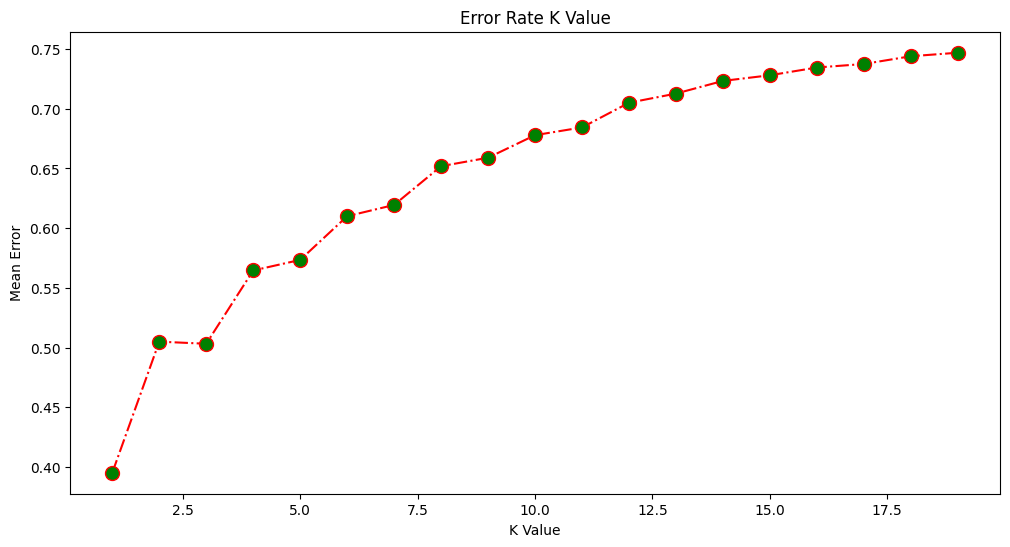

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashdot', marker='o',markerfacecolor='green', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [ ]:
# confusion matrix and accuracy

from sklearn import metrics
from sklearn.metrics import classification_report

print(f"Classification report for classifier {knn_classifier}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

# 35

Classification report for classifier KNeighborsClassifier(n_jobs=-1, n_neighbors=1):
               precision    recall  f1-score   support

     business       0.44      0.86      0.58       375
        crime       0.68      0.39      0.49       359
entertainment       0.77      0.64      0.70       522
      politic       0.73      0.52      0.60       439

     accuracy                           0.60      1695
    macro avg       0.65      0.60      0.59      1695
 weighted avg       0.67      0.60      0.61      1695




# Saving and Loading Best Model/Vectorizer and Selector.

In [ ]:
import joblib

# Save the SVM model
svm_model_filename = 'svm_model.pkl'
joblib.dump(svm_model, svm_model_filename)


['svm_model.pkl']

In [ ]:
# Save the TfidfVectorizer
vectorizer_filename = 'vectorizer.pkl'
joblib.dump(vectorizer, vectorizer_filename)

['vectorizer.pkl']

In [ ]:
# Save the Selector
selector_filename = 'selector.pkl'
joblib.dump(selector, selector_filename)

['selector.pkl']

In [ ]:
import joblib

# Load the SVM model
loaded_model = joblib.load('svm_model.pkl')

# Load the TfidfVectorizer
loaded_vectorizer = joblib.load('vectorizer.pkl')

# Load the selector
loaded_selector = joblib.load('selector.pkl')


In [ ]:
line = "ဒီကနေ့ ဒီဇင်ဘာလ ၂၁ ရက်နေ့ နေ့လယ်ပိုင်းမှာလည်း ရေဦးနဲ့ တန့်ဆည်မြို့နယ် နယ်နမိတ်ထိစပ်နေတဲ့နေရာနားက လိပ်ခြံရွာက ပီဒီအက်ဖ်စခန်းတွေလို့ ယူဆတဲ့နေရာတွေကို စစ်ကောင်စီတပ်ရဲ့ ရဟတ်ယာဉ်တွေက ပစ်ခတ်တာတွေ ဆက်လုပ်ခဲ့တယ်လို့ ဒေသခံတွေထံက သိရပါတယ်။"

In [ ]:
tokenize(line)
#"ဒီကနေ့ ဒီဇင်ဘာလ ၂၁ ရက်နေ့ နေ့လယ်ပိုင်းမှာလည်း ရေဦးနဲ့ တန့်ဆည်မြို့နယ် နယ်နမိတ်ထိစပ်နေတဲ့နေရာနားက လိပ်ခြံရွာက ပီဒီအက်ဖ်စခန်းတွေလို့ ယူဆတဲ့နေရာတွေကို
# စစ်ကောင်စီတပ်ရဲ့ ရဟတ်ယာဉ်တွေက ပစ်ခတ်တာတွေ ဆက်လုပ်ခဲ့တယ်လို့ ဒေသခံတွေထံက သိရပါတယ်။"

['ဒီ',
 'က',
 'နေ့',
 'ဒီဇင်ဘာ',
 'လ',
 '၂၁',
 'ရက်နေ့',
 'နေ့လယ်',
 'ပိုင်း',
 'မှာ',
 'လည်း',
 'ရေဦး',
 'နဲ့',
 'တန့်ဆည်',
 'မြို့နယ်',
 'နယ်နမိတ်',
 'ထိစပ်',
 'နေ',
 'တဲ့',
 'နေရာ',
 'နားကလိပ်ခြံ',
 'ရွာ',
 'က',
 'ပီဒီအက်ဖ်စခန်း',
 'တွေ',
 'လို့',
 'ယူဆ',
 'တဲ့',
 'နေရာ',
 'တွေ',
 'ကို',
 'စစ်ကောင်စီ',
 'တပ်',
 'ရဲ့',
 'ရဟတ်ယာဉ်',
 'တွေ',
 'က',
 'ပစ်ခတ်',
 'တာ',
 'တွေ',
 'ဆက်လုပ်',
 'ခဲ့',
 'တယ်',
 'လို့',
 'ဒေသခံ',
 'တွေ',
 'ထံ',
 'က',
 'သိရ',
 'ပါ',
 'တယ်',
 '။']

# Prediction

In [ ]:
#CleanPattern = re.compile(r'\d+|[၊။!-/:_\'’"”■—[-`{-~\t ]|[A-Za-z0-9]')
CleanPattern = re.compile(r'\d+|[၊။!-/:_\'’"”■—[-`{-~\t ]')
def clean_sentence(sentence):
    sent = CleanPattern.sub(" ", str(sentence))
    return sent

def stop_word(sentence):
    new_sentence = []
    for word in sentence.split():
        if word not in stopwordslist:
            new_sentence.append(word)
    return ' '.join(new_sentence)

def tokenize(line):
    line = clean_sentence(line)
    sentence = pds.tokenize(line, form="word")
    sentence = ' '.join([str(elem) for elem in sentence])
    sentence = stop_word(sentence)
    return sentence

In [ ]:
# user = input("Enter a Text: ")
# user = tokenize(user)
# data = selector.transform(vectorizer.transform([user]).toarray())
# output = svm_model.predict(data)
# print(output)

In [ ]:
# user = input("Enter a Text: ")
# user = tokenize(user)
# data = loaded_vectorizer.transform([user]).toarray()
# output = loaded_model.predict(data)
# print(output)

In [ ]:
# user = input("Enter a Text: ")
# user = tokenize(user)
# data = loaded_vectorizer.transform([user]).toarray()
# output = loaded_model.predict(data)
# print(output)

In [ ]:
# user = input("Enter a Text: ")
# user = tokenize(user)
# data = loaded_vectorizer.transform([user]).toarray()
# output = loaded_model.predict(data)
# print(output)

In [ ]:
# user = input("Enter a Text: ")
# user = tokenize(user)
# data = loaded_vectorizer.transform([user]).toarray()
# output = loaded_model.predict(data)
# print(output)

In [ ]:
# user = input("Enter a Text: ")
# user = tokenize(user)
# data = loaded_vectorizer.transform([user]).toarray()
# output = loaded_model.predict(data)
# print(output)

In [ ]:
# user = input("Enter a Text: ")
# user = tokenize(user)
# data = loaded_vectorizer.transform([user]).toarray()
# output = loaded_model.predict(data)
# print(output)

In [ ]:
# user = input("Enter a Text: ")
# user = tokenize(user)
# data = loaded_vectorizer.transform([user]).toarray()
# output = loaded_model.predict(data)
# print(output)

In [ ]:
# user = input("Enter a Text: ")
# user = tokenize(user)
# data = loaded_vectorizer.transform([user]).toarray()
# output = loaded_model.predict(data)
# print(output)

In [ ]:
# user = input("Enter a Text: ")
# user = tokenize(user)
# data = loaded_vectorizer.transform([user]).toarray()
# output = loaded_model.predict(data)
# print(output)

In [ ]:
# user = input("Enter a Text: ")
# user = tokenize(user)
# data = loaded_vectorizer.transform([user]).toarray()
# output = loaded_model.predict(data)
# print(output)

In [ ]:
# user = input("Enter a Text: ")
# user = tokenize(user)
# data = loaded_vectorizer.transform([user]).toarray()
# output = loaded_model.predict(data)
# print(output)

In [ ]:
# user = input("Enter a Text: ")
# user = tokenize(user)
# data = loaded_vectorizer.transform([user]).toarray()
# output = loaded_model.predict(data)
# print(output)

In [ ]:
# user = input("Enter a Text: ")
# user = tokenize(user)
# data = loaded_vectorizer.transform([user]).toarray()
# output = loaded_model.predict(data)
# print(output)

In [ ]:
# user = input("Enter a Text: ")
# user = tokenize(user)
# data = loaded_vectorizer.transform([user]).toarray()
# output = loaded_model.predict(data)
# print(output)

In [ ]:
# user = input("Enter a Text: ")
# user = tokenize(user)
# data = loaded_vectorizer.transform([user]).toarray()
# output = loaded_model.predict(data)
# print(output)

In [ ]:
# user = input("Enter a Text: ")
# user = tokenize(user)
# data = loaded_vectorizer.transform([user]).toarray()
# output = loaded_model.predict(data)
# print(output)

## Testing with Test Case

In [ ]:
from sklearn.metrics import accuracy_score

# Load CSV into DataFrame
df = pd.read_csv('TestingCase.csv')

In [ ]:
user = input("Enter a Text: ")
user = tokenize(user)
data = selector.transform(vectorizer.transform([user]).toarray())
output = svm_model.predict(data)
print(output)

Enter a Text: အစ္စရေး သိမ်းပိုက်ထားတဲ့ အနောက်ဘက်ကမ်းက အစ္စရေး စစ်ဆေးရေးဂိတ်တခုနားမှာ ပါလက်စတိုင်း သေနတ်သမားတွေက ပစ်ခတ်လို့ လူတယောက် သေဆုံးပြီး အနည်းဆုံး ငါးဦး ဒဏ်ရာရခဲ့ပါတယ်။
['crime']


In [ ]:
# for index, row in df.iterrows():
#   print(f"Row is {row} and index is {index}")

In [ ]:
# Initialize lists to store predictions and actual classes
predictions = []
actual_classes = []

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    user = tokenize(row['news'])  # Use the news column as input
    data = selector.transform(vectorizer.transform([user]).toarray())
    output = svm_model.predict(data)
    predictions.append(output[0])  # Append the prediction
    actual_classes.append(row['class'])  # Append the actual class



# # Initialize lists to store predictions and actual classes
# predictions = []
# actual_classes = []

# # Iterate through each row in the DataFrame
# for index, row in df.iterrows():
#     user_input = tokenize(row['news'])  # Use the news column as input
#     data = loaded_vectorizer.transform([user_input]).toarray()
#     output = loaded_model.predict(data)
#     predictions.append(output[0])  # Append the prediction
#     actual_classes.append(row['class'])  # Append the actual class

In [ ]:
# Calculate accuracy for each category
categories = df['class'].unique()
category_accuracies = {}
for category in categories:
    indices = [i for i, x in enumerate(actual_classes) if x == category]
    category_predictions = [predictions[i] for i in indices]
    category_actual = [actual_classes[i] for i in indices]
    category_accuracy = accuracy_score(category_actual, category_predictions)
    category_accuracies[category] = (category_accuracy, len(indices))

In [ ]:
# Print accuracies
print("Accuracy for each category:")
for category, (accuracy, count) in category_accuracies.items():
    print(f"{category} = {round(accuracy*100)}% ({round(accuracy*25)}/25)")


  # with vectorizer
#   Accuracy for each category:
# entertainment = 100% (25/25)
# politic = 84% (21/25)
# crime = 88% (22/25)
# business = 88% (22/25)

Accuracy for each category:
entertainment = 92% (23/25)
politic = 80% (20/25)
crime = 84% (21/25)
business = 84% (21/25)


# End of the Topic Classification

---